# Example - Safe Divide

In [1]:
def divide(x,y):
    return x/y

In [2]:
divide(4,2)

2.0

In [3]:
divide(4,0)

ZeroDivisionError: division by zero

Let's try and handle bad user inputs:

In [4]:
def saferDivide(x,y):
    try:
        return x/y
    except ZeroDivisionError:
        print("Oh no")
        return float("inf")

In [5]:
saferDivide(4,2)

2.0

In [6]:
saferDivide(4,0)

Oh no


inf

In [7]:
saferDivide(4,'2')

TypeError: unsupported operand type(s) for /: 'int' and 'str'

Let's try to handle String inputs:

In [14]:
def safestDivide(x,y):
    try:
        return x/y
    except ZeroDivisionError:
        print("Oh no")
        if x==0:
            return float("nan")
        else:
            return float("inf")
    except (TypeError, ValueError):
        print('Oops')
        if type(x) == str or type(y) == str:
            return float(x)/float(y)
        return float("nan")
    except:
        print("I don't know what happened")
        raise

In [9]:
saferDivide(4,2)

2.0

In [10]:
saferDivide(4,0)

Oh no


inf

In [15]:
safestDivide(4,[1,2,3])

Oops


nan

# Example - handling user inputs
Let's make a little game - the user will keep guessing numbers until they correctly guess the randomly generated number. The game should give clues to help the user get closer.

In [23]:
import random
def play(maxNumber):
    print("Welcome")
    secret = random.choice(range(1,maxNumber))
    # numGuesses = 0
    userGuess = 0
    while userGuess != secret:
        userGuess = input("Enter your guess: ")
        try:
            userGuess = int(userGuess)
        except:
            print("Put in an integer!")
            continue
        if userGuess > 100:
            print(f"Put in an integer less than {maxNumber}.")
            continue
        if userGuess > secret:
            print("Try a smaller number.")
        elif userGuess < secret:
            print("Try a larger number.")
    print(f"Well done! The number was {secret}.")
        ##### Finish game here

play(100)

Welcome
Enter your guess: 2
Try a larger number.
Enter your guess: 56
Try a smaller number.
Enter your guess: 34
Try a larger number.
Enter your guess: 40
Try a larger number.
Enter your guess: 45
Try a smaller number.
Enter your guess: 43
Try a larger number.
Enter your guess: 44
Well done! The number was 44.


# Example - create a hangman-type game

## A)
Write a function, playHangman(word_set, numGuesses), which takes a list of possible words and gives the user numGuesses chances to guess the word. Similar to the game hangman, the user can enter a letter and the game will show where in the word the letter shows up, or the user can guess a full word. The function should properly handle bad input types. A sample game might look like this:

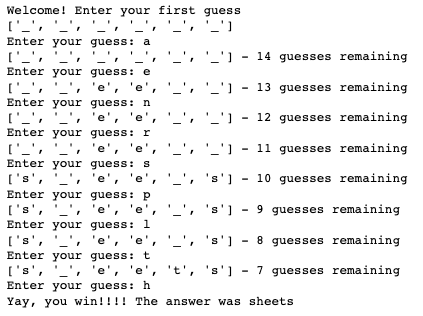

In [6]:
from IPython.display import Image
Image(filename='Files/hangmanExample.png',width=400)

In [1]:
import random

wordList = ["potato","tomato","yay","wow","cunningham", "vang", "centerboard",
             "autobailer", "capsize", "spinnaker", "telltales"]

def playHangman(wordSet,numGuesses):
    word = random.choice(wordSet)
    listWord = []
    listWord[:0] = word
    guessWord = ["_"] * len(listWord)
    pastGuesses = []
    # print(listWord)
    print(f"Welcome! You have {numGuesses} guesses to find the secret word:")
    print(guessWord,"\n")
    while numGuesses > 0:
        guess = input("Enter your guess: ")
        if len(guess) == 1 and guess.isalpha() and guess not in pastGuesses:
            for i,x in enumerate(word):
                if guess == x:
                    guessWord[i] = str(guess)
            numGuesses -= 1
            print(f"{guessWord} - {numGuesses} guesses remaining \n")
            if listWord == guessWord:
                numGuesses = 0
            pastGuesses.append(guess)
        elif len(guess) == len(listWord) and guess.isalpha() and guess not in pastGuesses:
            guessWordLong = []
            guessWordLong[:0] = guess
            if listWord == guessWordLong:
                numGuesses = 0
            else:
                numGuesses -= 1
                print(f"{guessWordLong[0].upper()}{guess[1:(len(guess))]} was not the correct word.")
                print(f"{guessWord} - {numGuesses} guesses remaining \n")
                pastGuesses.append(guess)
        elif guess in pastGuesses:
            print(f"Enter a new guess. Your past guesses were: {pastGuesses} - {numGuesses} guesses remaning. \n")
        else:
            print(f"Enter a letter or a {len(word)} letter word guess - {numGuesses} guesses remaining. \n")
    print(f"Yay, you win! The answer was {word}.")

In [13]:
word = "yay"
guess = "yeet"
if len(guess) == 1 or len(guess) == len(word):
    print("yep")
    
print(len(str("1.5")))

3


## B)
Parse hangmanText.txt to create a list of words that you can use to play your hangman game.

In [6]:
import re
import string
import numpy as np

with open("Files/hangmanText.txt", "r") as file:
    words = file.read()

words = re.sub('['+string.punctuation+']',"", words)
words = words.split()
words = [w.lower() for w in words if w.isalpha() and len(w)>6]
words = np.unique(words)

In [7]:
playHangman(words,15)

Welcome! You have 15 guesses to find the secret word:
['_', '_', '_', '_', '_', '_', '_'] 

Enter your guess: a
['_', '_', '_', '_', '_', '_', '_'] - 14 guesses remaining 

Enter your guess: e
['_', '_', '_', '_', '_', '_', '_'] - 13 guesses remaining 

Enter your guess: i
['_', 'i', '_', '_', 'i', '_', '_'] - 12 guesses remaining 

Enter your guess: d
['_', 'i', '_', '_', 'i', '_', '_'] - 11 guesses remaining 

Enter your guess: s
['_', 'i', 's', '_', 'i', '_', '_'] - 10 guesses remaining 

Enter your guess: o
['_', 'i', 's', '_', 'i', '_', '_'] - 9 guesses remaining 

Enter your guess: y
['_', 'i', 's', '_', 'i', '_', '_'] - 8 guesses remaining 

Enter your guess: u
['_', 'i', 's', '_', 'i', '_', '_'] - 7 guesses remaining 

Enter your guess: n
['_', 'i', 's', '_', 'i', 'n', '_'] - 6 guesses remaining 

Enter your guess: g
['_', 'i', 's', '_', 'i', 'n', 'g'] - 5 guesses remaining 

Enter your guess: t
['_', 'i', 's', '_', 'i', 'n', 'g'] - 4 guesses remaining 

Enter your guess: r
['_